<a href="https://colab.research.google.com/github/Nkosiphendule999/Exam/blob/main/N_Ncobela_CrimeAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. **Student number :** 22423967
2. **Surname & initials:** NCOBELA N






**Datasets links**

[Dataset1 link](https://www.saps.gov.za/services/crimestats.php)

[Dataset2 link](https://www.kaggle.com/datasets/slwessels/crime-statistics-for-south-africa)

**Importing libraies**

In [151]:
!pip install prophet

In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report
from prophet import Prophet
from sklearn.preprocessing import StandardScaler
import zipfile


with zipfile.ZipFile('/content/drive/MyDrive/NewDataSet/Crime dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

with zipfile.ZipFile('/content/drive/MyDrive/NewDataSet/archive.zip', 'r') as zip_ref:
        zip_ref.extractall('data')

Reading the datasets

In [153]:
SA_data = pd.read_csv('/content/data/SouthAfricaCrimeStats_v2.csv')
Pro_data = pd.read_csv('/content/data/ProvincePopulation.csv')

Reading the datasets

In [154]:
SA_data

,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
0,Western Cape,Cape Town Central,All theft not mentioned elsewhere,6692,6341,5966,5187,4985,5127,5285,5937,5600,5335,5176
1,Gauteng,Jhb Central,All theft not mentioned elsewhere,6093,4602,3761,3610,3267,3037,2886,2638,2809,3050,2434
2,Western Cape,Mitchells Plain,All theft not mentioned elsewhere,5341,6093,6316,6803,6035,5761,6108,5514,4975,4043,3635
3,Free State,Park Road,All theft not mentioned elsewhere,5108,4282,3834,3316,3101,3013,2679,3116,2927,2297,2103
4,Gauteng,Pretoria Central,All theft not mentioned elsewhere,5099,4536,3309,2694,2616,2606,2635,3226,3246,2892,3030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30856,Western Cape,Belhar,All theft not mentioned elsewhere,0,0,250,837,710,746,839,762,882,1015,829
30857,Gauteng,Moffatview,All theft not mentioned elsewhere,0,0,0,0,0,0,0,1012,1195,1294,991
30858,Western Cape,Belhar,Drug-related crime,0,0,54,238,291,583,840,1117,1197,1237,1401
30859,Western Cape,Lentegeur,All theft not mentioned elsewhere,0,0,0,0,0,0,0,0,1300,2346,1989


Checking for duplicated columns or rows

In [155]:
SA_data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
30856,False
30857,False
30858,False
30859,False


If there were duplicates i would have dropded them using

In [156]:
#SA_data.drop_duplicates(inplace=True)

Dropping all null values

In [157]:
SA_data = SA_data.fillna('')

Dropping all columns with values under category (**All theft not mentioned elsewhere**)

In [158]:
SA_data = SA_data[SA_data['Category'] != "All theft not mentioned elsewhere"]

Sorting the index after dropping

In [159]:
SA_data.reset_index(drop=True , inplace=True)
SA_data

,Province,Station,Category,2005-2006,2006-2007,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016
0,Western Cape,Cape Town Central,Theft out of or from motor vehicle,3468,2924,2329,1856,2905,3051,3474,3294,3612,3441,3509
1,Western Cape,Mitchells Plain,Drug-related crime,3064,3683,4792,5699,6571,6260,5850,6310,6044,4768,4609
2,Kwazulu/Natal,Durban Central,Robbery with aggravating circumstances,2721,3214,2134,1966,1371,899,924,885,951,982,1024
3,Western Cape,Mitchells Plain,Common assault,2657,2339,2131,2735,2749,2444,2810,2757,2185,1847,2079
4,Gauteng,Jhb Central,Commercial crime,2585,2740,2844,2870,2867,2386,2475,1680,1296,1188,1137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29713,Gauteng,Mamelodi East,Assault with the intent to inflict grievous bo...,0,489,834,774,797,588,645,650,664,766,732
29714,Gauteng,Diepsloot,Assault with the intent to inflict grievous bo...,0,0,0,0,0,156,590,594,612,528,776
29715,Kwazulu/Natal,Kwamashu E,Shoplifting,0,0,0,0,0,170,364,439,468,829,802
29716,Western Cape,Belhar,Drug-related crime,0,0,54,238,291,583,840,1117,1197,1237,1401


In [160]:
Pro_data

,Province,Population,Area,Density
0,Gauteng,12272263,18178,675.1
1,Kwazulu/Natal,10267300,94361,108.8
2,Mpumalanga,4039939,76495,52.8
3,Western Cape,5822734,129462,45.0
4,Limpopo,5404868,125755,43.0
5,Eastern Cape,6562053,168966,38.8
6,North West,3509953,104882,33.5
7,Free State,2745590,129825,21.1
8,Northern Cape,1145861,372889,3.1


In [161]:
Pro_data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False


Merging SA_data [Province + year]

In [162]:
print(SA_data.columns)

Index(['Province', 'Station', 'Category', '2005-2006', '2006-2007',
       '2007-2008', '2008-2009', '2009-2010', '2010-2011', '2011-2012',
       '2012-2013', '2013-2014', '2014-2015', '2015-2016'],
      dtype='object')


First we will group all total incident per  station by **Province, Station & Year**

In [163]:
# Total incidents per station year
SA_data_melted = SA_data.melt(id_vars=['Province', 'Station', 'Category'],
                              var_name='Year',
                              value_name='Incidents')

total_incidents = SA_data_melted.groupby(['Province', 'Station', 'Year'])['Incidents'].sum().reset_index()
total_incidents

,Province,Station,Year,Incidents
0,Eastern Cape,'King William''S Town',2005-2006,3339
1,Eastern Cape,'King William''S Town',2006-2007,3237
2,Eastern Cape,'King William''S Town',2007-2008,3288
3,Eastern Cape,'King William''S Town',2008-2009,3904
4,Eastern Cape,'King William''S Town',2009-2010,3886
...,...,...,...,...
12568,Western Cape,Wynberg,2011-2012,3023
12569,Western Cape,Wynberg,2012-2013,3367
12570,Western Cape,Wynberg,2013-2014,3391
12571,Western Cape,Wynberg,2014-2015,3264


Now we merge

In [164]:
# Create a DataFrame with all unique Province and Year combinations from total_incidents
all_province_years = total_incidents[['Province', 'Year']].drop_duplicates()

# Merge Pro_data with all_province_years to add the 'Year' column
Pro_data_with_year = pd.merge(all_province_years, Pro_data, on='Province', how='left')

# Now merge the total_incidents with the new Pro_data_with_year DataFrame
merged_data = pd.merge(total_incidents, Pro_data_with_year, on=['Province', 'Year'], how='left')
merged_data

,Province,Station,Year,Incidents,Population,Area,Density
0,Eastern Cape,'King William''S Town',2005-2006,3339,6562053,168966,38.8
1,Eastern Cape,'King William''S Town',2006-2007,3237,6562053,168966,38.8
2,Eastern Cape,'King William''S Town',2007-2008,3288,6562053,168966,38.8
3,Eastern Cape,'King William''S Town',2008-2009,3904,6562053,168966,38.8
4,Eastern Cape,'King William''S Town',2009-2010,3886,6562053,168966,38.8
...,...,...,...,...,...,...,...
12568,Western Cape,Wynberg,2011-2012,3023,5822734,129462,45.0
12569,Western Cape,Wynberg,2012-2013,3367,5822734,129462,45.0
12570,Western Cape,Wynberg,2013-2014,3391,5822734,129462,45.0
12571,Western Cape,Wynberg,2014-2015,3264,5822734,129462,45.0


**Defining hostpost label(top 25% per year)**

In [165]:
# Reseting the index to make 'Year' a regular column
merged_data = merged_data.reset_index(drop=True)

# Calculating Total_Incidents per Station and Year
merged_data['Total_Incidents'] = merged_data.groupby(['Province', 'Station', 'Year'])['Incidents'].transform('sum')

# Calculating the 75th percentile threshold for Total_Incidents per Year
thresholds = merged_data.groupby('Year')['Total_Incidents'].quantile(0.75)

# Maping the thresholds back to the main DataFrame
merged_data['Threshold'] = merged_data['Year'].map(thresholds)

# Defining Hotspot based on the threshold
merged_data['Hotspot'] = (merged_data['Total_Incidents'] >= merged_data['Threshold']).astype(int)

# Dropping the temporary Threshold column
merged_data = merged_data.drop(columns=['Threshold'])

merged_data

,Province,Station,Year,Incidents,Population,Area,Density,Total_Incidents,Hotspot
0,Eastern Cape,'King William''S Town',2005-2006,3339,6562053,168966,38.8,3339,1
1,Eastern Cape,'King William''S Town',2006-2007,3237,6562053,168966,38.8,3237,1
2,Eastern Cape,'King William''S Town',2007-2008,3288,6562053,168966,38.8,3288,1
3,Eastern Cape,'King William''S Town',2008-2009,3904,6562053,168966,38.8,3904,1
4,Eastern Cape,'King William''S Town',2009-2010,3886,6562053,168966,38.8,3886,1
...,...,...,...,...,...,...,...,...,...
12568,Western Cape,Wynberg,2011-2012,3023,5822734,129462,45.0,3023,1
12569,Western Cape,Wynberg,2012-2013,3367,5822734,129462,45.0,3367,1
12570,Western Cape,Wynberg,2013-2014,3391,5822734,129462,45.0,3391,1
12571,Western Cape,Wynberg,2014-2015,3264,5822734,129462,45.0,3264,1


Data Visualization

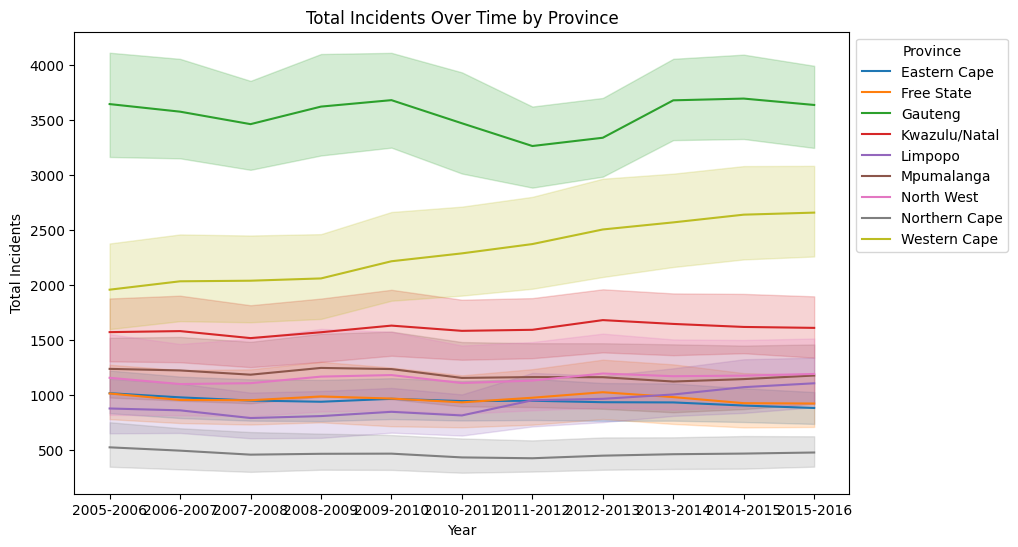

In [166]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_data, x='Year', y='Incidents', hue='Province')
plt.title('Total Incidents Over Time by Province')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.legend(title='Province', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Focusing on 1 Province

1.   Filter only KZN
2.   Leave the rest



In [167]:
kzn_df = merged_data[merged_data['Province'] == 'Kwazulu/Natal'].copy()

**Histplot**

In [168]:
print(kzn_df.columns)

Index(['Province', 'Station', 'Year', 'Incidents', 'Population', 'Area',
       'Density', 'Total_Incidents', 'Hotspot'],
      dtype='object')


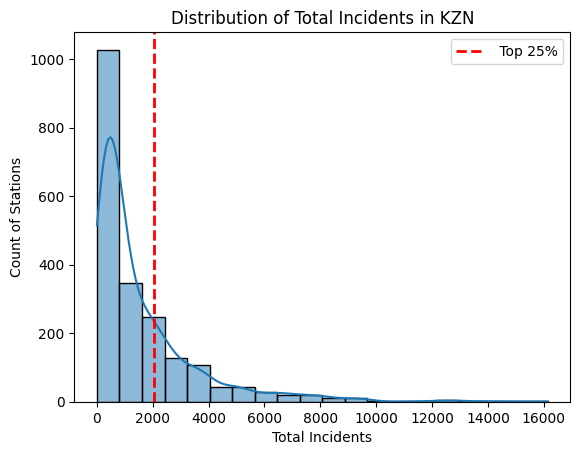

In [169]:
sns.histplot(kzn_df['Total_Incidents'], bins=20, kde=True)
plt.axvline(kzn_df['Total_Incidents'].quantile(0.75), color='red', linestyle='dashed', linewidth=2, label=' Top 25%')
plt.title("Distribution of Total Incidents in KZN")
plt.xlabel("Total Incidents")
plt.ylabel("Count of Stations")
plt.legend()
plt.show()

**Top Crime Categories in KZN** (Bar Chart)

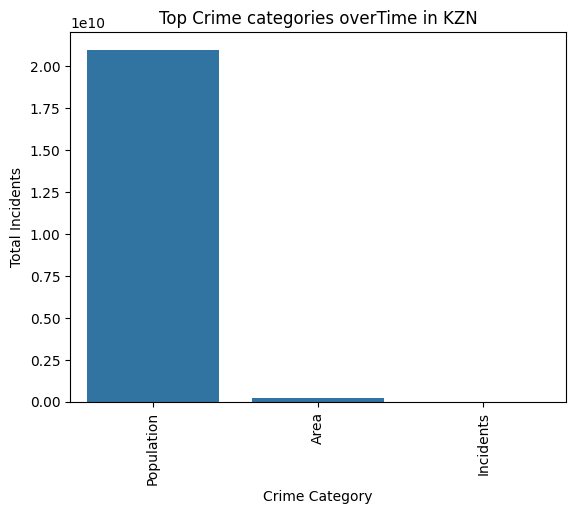

In [170]:
crime_cols = kzn_df.columns[3: -3]
top_crimes = kzn_df[crime_cols].sum().sort_values(ascending=False)

sns.barplot(x=top_crimes.index, y=top_crimes.values)
plt.title("Top Crime categories overTime in KZN")
plt.xlabel("Crime Category")
plt.ylabel("Total Incidents")
plt.xticks(rotation=90)
plt.show()

**Boxplot**

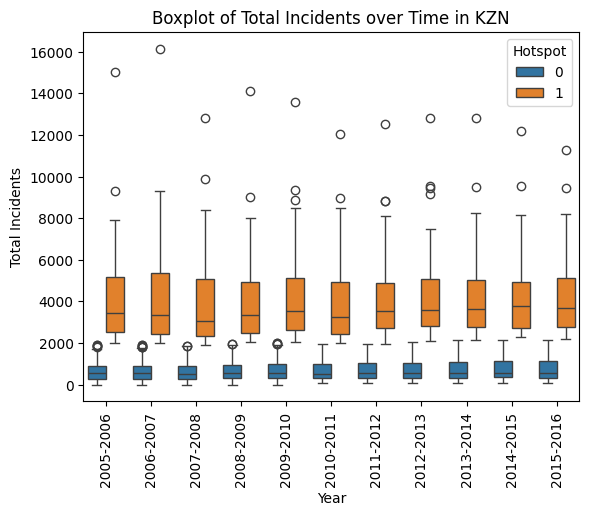

In [171]:
sns.boxplot(data=kzn_df, x='Year', y='Total_Incidents', hue='Hotspot')
plt.xticks(rotation=90)
plt.title("Boxplot of Total Incidents over Time in KZN")
plt.xlabel("Year")
plt.ylabel("Total Incidents")
plt.show()

**Incedets Overtime in KZN ** (Line chart)

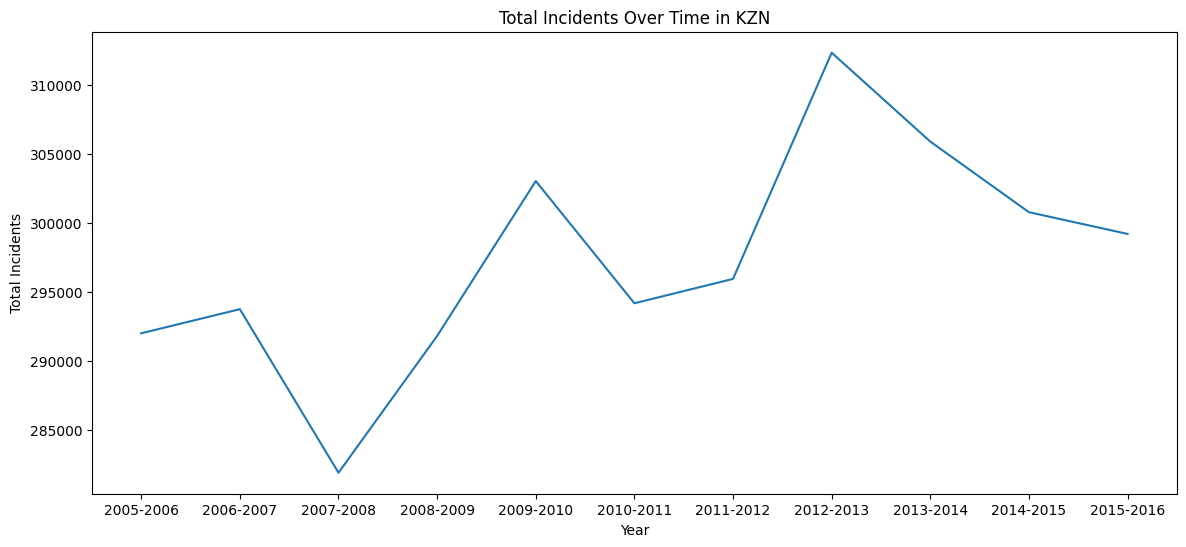

In [172]:
yearly = kzn_df.groupby('Year')['Total_Incidents'].sum().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(data=yearly, x='Year', y='Total_Incidents', markers=True)
plt.title("Total Incidents Over Time in KZN")
plt.xlabel("Year")
plt.ylabel("Total Incidents")
plt.show()

**Hotspot vs Non_Hotspots Crime comparision** (Violin)

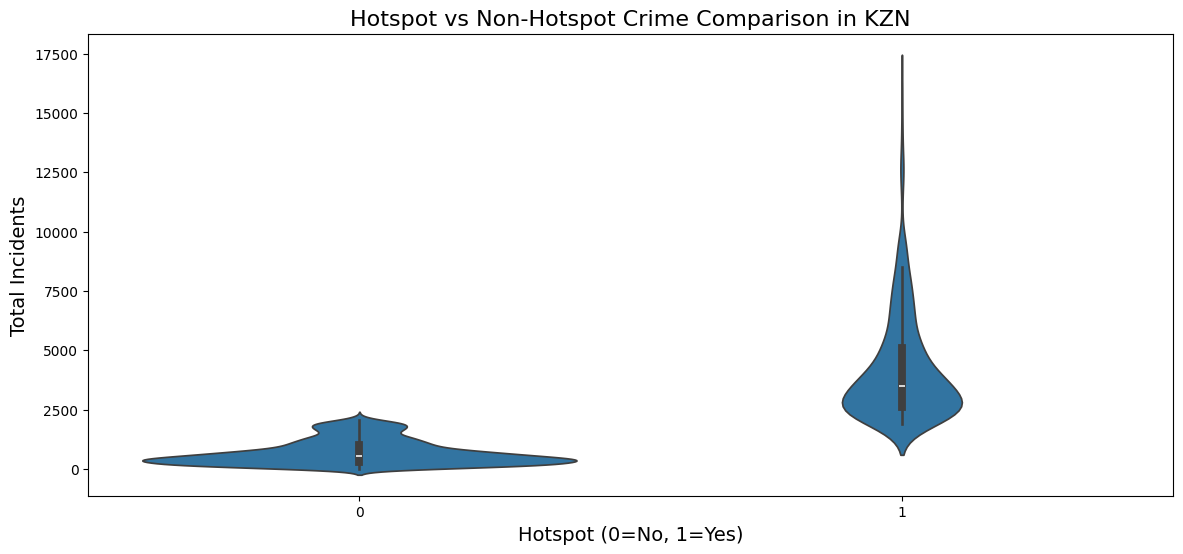

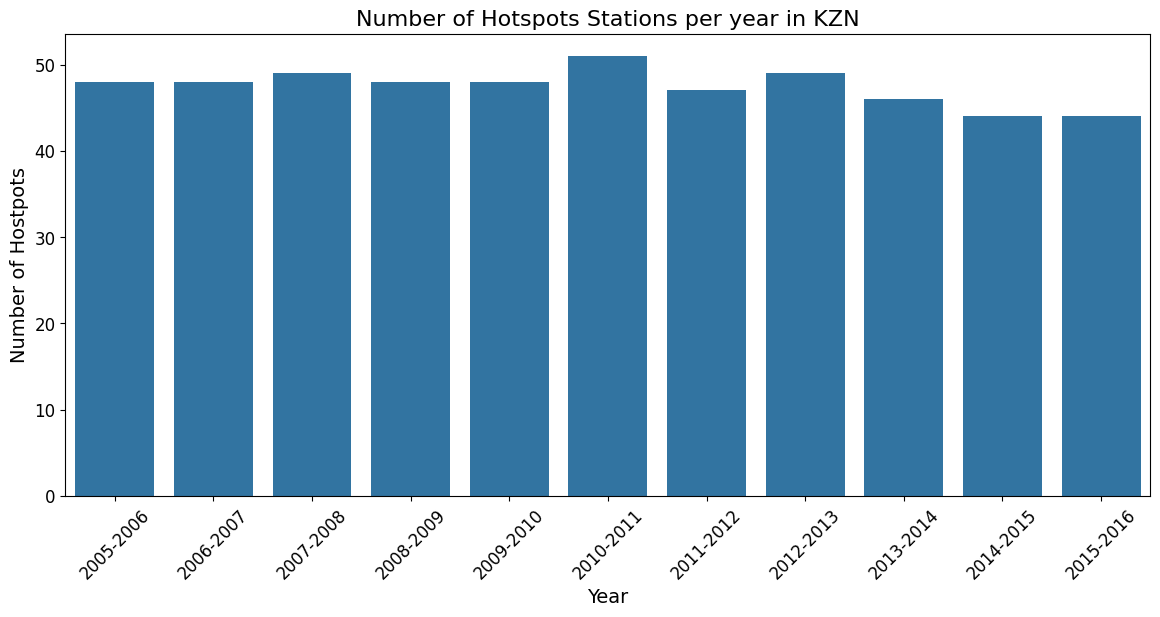

In [173]:
hotspot_counts = kzn_df.groupby('Year')['Hotspot'].sum().reset_index()
# non_hotspot_counts = kzn_df.groupby(kzn_df.index.get_level_values('Year'))['Hotspot'].count() - hotspot_counts # This line is not used in the plotting code below

plt.figure(figsize=(14, 6))
sns.violinplot(data=kzn_df, x='Hotspot', y='Total_Incidents')
plt.title("Hotspot vs Non-Hotspot Crime Comparison in KZN", fontsize=16)
plt.xlabel("Hotspot (0=No, 1=Yes)", fontsize=14)
plt.ylabel("Total Incidents", fontsize=14)
plt.show()

plt.figure(figsize=(14, 6))
sns.barplot(data=hotspot_counts, x='Year', y='Hotspot')
plt.title("Number of Hotspots Stations per year in KZN", fontsize=16)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Number of Hostpots",fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Data Training**

In [174]:
print(kzn_df.head())

           Province         Station       Year  Incidents  Population   Area  \
4939  Kwazulu/Natal  Alexandra Road  2005-2006       2836    10267300  94361   
4940  Kwazulu/Natal  Alexandra Road  2006-2007       3265    10267300  94361   
4941  Kwazulu/Natal  Alexandra Road  2007-2008       3163    10267300  94361   
4942  Kwazulu/Natal  Alexandra Road  2008-2009       3303    10267300  94361   
4943  Kwazulu/Natal  Alexandra Road  2009-2010       3647    10267300  94361   

      Density  Total_Incidents  Hotspot  
4939    108.8             2836        1  
4940    108.8             3265        1  
4941    108.8             3163        1  
4942    108.8             3303        1  
4943    108.8             3647        1  


**Selecting features and target**

In [175]:
features = ["Incidents", "Population","Area","Density"]
target = "Hotspot"

x=kzn_df[features]
y=kzn_df[target]

In [176]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [177]:
from sklearn.preprocessing import StandardScaler

**Scaling features**

In [178]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

**Spliting data**

In [179]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=42)

**Train the model**

In [180]:
from sklearn.ensemble import RandomForestClassifier

In [181]:
rf= RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

**Evaluating** data

In [182]:
y_pred = rf.predict(x_test)
# Check if predict_proba returns probabilities for two classes before accessing the second column
y_prob = rf.predict_proba(x_test)[:, 1] if rf.predict_proba(x_test).shape[1] > 1 else rf.predict_proba(x_test)[:, 0]

accuracy = accuracy_score(y_test, y_pred)
# Calculate ROC AUC only if there are both positive and negative samples in y_test
if len(y_test.unique()) > 1:
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"ROC AUC: {roc_auc:.4f}")
else:
    print("ROC AUC cannot be calculated as there is only one class in y_test.")

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

ROC AUC: 0.9964
Accuracy: 0.9766
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       381
           1       0.95      0.95      0.95       131

    accuracy                           0.98       512
   macro avg       0.97      0.97      0.97       512
weighted avg       0.98      0.98      0.98       512



**Forecasting data**

In [183]:

kzn_df = kzn_df.rename(columns={"Yera_num": "Year_num"})

In [184]:
#Preparing data (Converting to Monthly)
kzn_df["Year_num"] = kzn_df["Year"].str[:4].astype(int)

In [185]:
kzn_df["ds"] = pd.to_datetime(kzn_df["Year_num"].astype(str)+ "-06-01")

In [186]:
crime_monthly = kzn_df.groupby("ds")["Incidents"].sum().reset_index()
crime_monthly = crime_monthly.rename(columns={"Incidents": "y"})
crime_monthly.head()

,ds,y
0,2005-06-01,292006
1,2006-06-01,293752
2,2007-06-01,281913
3,2008-06-01,291812
4,2009-06-01,303026


**Train prophet Model**

In [187]:
model = Prophet(yearly_seasonality=True, weekly_seasonality=False,
                daily_seasonality=False,
                changepoint_prior_scale=0.05)
model.fit(crime_monthly)

INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphinsd98k/ptr7pyvv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphinsd98k/858_ba4a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23733', 'data', 'file=/tmp/tmphinsd98k/ptr7pyvv.json', 'init=/tmp/tmphinsd98k/858_ba4a.json', 'output', 'file=/tmp/tmphinsd98k/prophet_modeleja_w_3g/prophet_model-20251006104750.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:47:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:47:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Making future prediction**

In [188]:
future = model.make_future_dataframe(periods=24, freq='ME')

**Forecasting**

In [189]:
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-06-01,-99038.839076,287142.959640,297301.006910,-99038.839076,-99038.839076,390952.645162,390952.645162,390952.645162,390952.645162,390952.645162,390952.645162,0.0,0.0,0.0,291913.806086
1,2006-06-01,-97201.734876,284714.140539,294345.197684,-97201.734876,-97201.734876,386830.996690,386830.996690,386830.996690,386830.996690,386830.996690,386830.996690,0.0,0.0,0.0,289629.261814
2,2007-06-01,-95364.630648,279989.581963,290032.908432,-95364.630648,-95364.630648,380239.938021,380239.938021,380239.938021,380239.938021,380239.938021,380239.938021,0.0,0.0,0.0,284875.307373
3,2008-06-01,-93522.488774,293910.886202,304102.931087,-93522.488774,-93522.488774,392598.704314,392598.704314,392598.704314,392598.704314,392598.704314,392598.704314,0.0,0.0,0.0,299076.215540
4,2009-06-01,-91685.046600,294706.489921,303862.743810,-91685.046600,-91685.046600,390952.645162,390952.645162,390952.645162,390952.645162,390952.645162,390952.645162,0.0,0.0,0.0,299267.598562


**Visualizing Forecast**

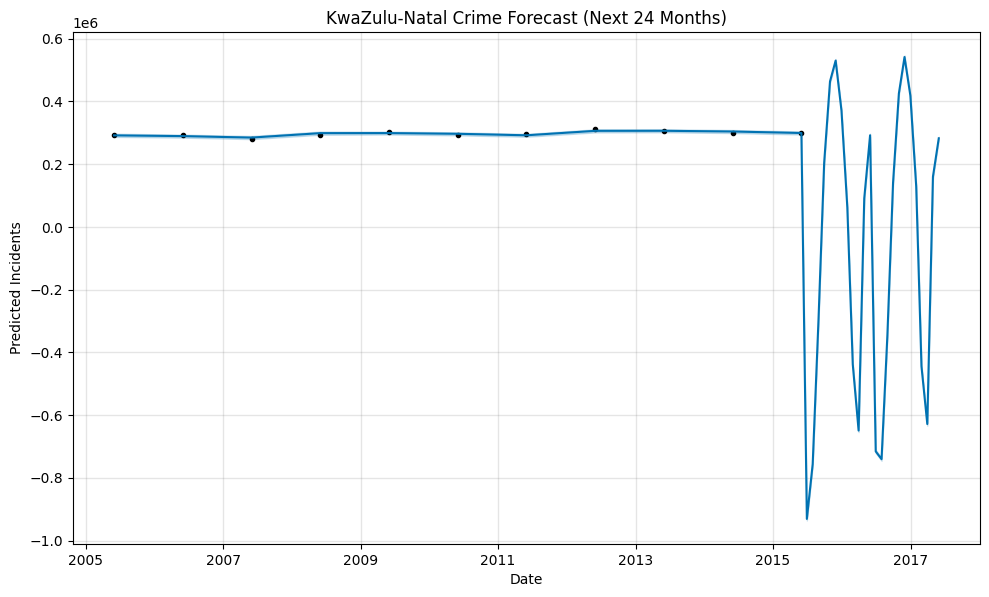

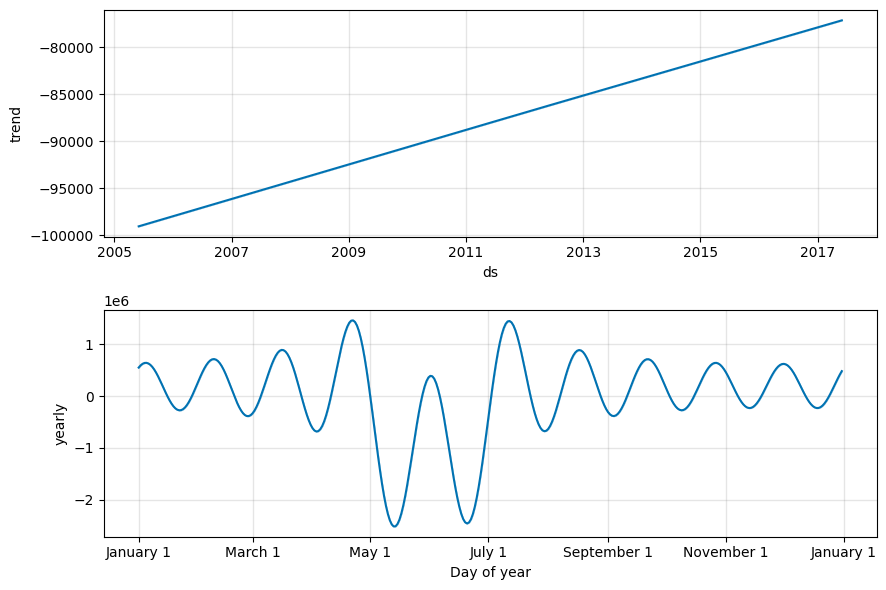

In [190]:
model.plot(forecast)
plt.title("KwaZulu-Natal Crime Forecast (Next 24 Months)")
plt.xlabel("Date")
plt.ylabel("Predicted Incidents")
plt.show()

model.plot_components(forecast)
plt.show()

**Viewing months prediction**

In [191]:
future_forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
future_forecast.head()
print("Forecast for Next 24 Months:")
print(future_forecast.tail(24))

Forecast for Next 24 Months:
           ds           yhat     yhat_lower     yhat_upper
11 2015-06-30 -931023.078881 -935962.576898 -926131.122878
12 2015-07-31 -756171.565312 -761177.371673 -751270.326990
13 2015-08-31 -293801.025191 -298710.340066 -288774.557314
14 2015-09-30  204567.549292  199443.713608  209131.617922
15 2015-10-31  463864.375026  458591.502605  468536.106838
16 2015-11-30  530486.372495  525690.899889  535460.513931
17 2015-12-31  370691.945535  365989.991760  375322.104335
18 2016-01-31   62444.106059   57579.332356   67411.943083
19 2016-02-29 -438384.606264 -443261.312608 -433609.066577
20 2016-03-31 -649310.644258 -654221.909103 -644307.700566
21 2016-04-30   91169.520506   85900.727214   95961.673535
22 2016-05-31  292264.936073  287458.428584  297322.311915
23 2016-06-30 -715763.763003 -720705.463538 -710849.104454
24 2016-07-31 -740341.772356 -745530.010784 -735521.328201
25 2016-08-31 -344457.093740 -349349.079084 -339355.633510
26 2016-09-30  140547.48305

In [192]:
forecast.to_csv('forecast.csv', index=False)
print("Forecast saved to 'forecast.csv'")

Forecast saved to 'forecast.csv'


In [194]:
!streamlit run app.py

/bin/bash: line 1: streamlit: command not found


In [ ]:
!pip install streamlit pyngrok